In [1]:
import numpy as np

# Exo 8



In [2]:
import numpy as np

import matplotlib.pyplot as plt

N = 10
A = 2*np.identity(N)
for i in range(N-1):
    A[i,i+1] = A[i+1,i] = -1
A

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

---

# check for eigenvectors

In [3]:
k = 2
N = 10
T = np.pi*k*np.arange(1,N+1)/(N+1)
U = np.sin(T)
#this fails sometimes, division by something close to  zero
A.dot(U)/U

array([0.31749293, 0.31749293, 0.31749293, 0.31749293, 0.31749293,
       0.31749293, 0.31749293, 0.31749293, 0.31749293, 0.31749293])

In [376]:
sum(np.linalg.eigvals(A)), np.linalg.eigvals(A)

(15.999999999999988,
 array([3.87938524, 3.53208889, 3.        , 2.34729636, 1.65270364,
        0.12061476, 0.46791111, 1.        ]))

In [381]:
np.linalg.det(A)

10.999999999999996

# Better to 

- write a function to generate the matrix $A$
- check that $-A$ is a discrete second derivative

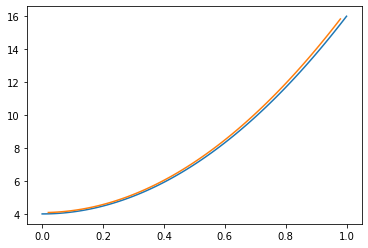

In [4]:
def M(n):
    A = 2*np.identity(n)
    for i in range(n-1):
        A[i,i+1] = A[i+1,i] = -1
    return A


X = np.linspace(0,1,100)

plt.plot(X, 12*X**2+4);
plt.plot(X[2:-2],-100**2*M(100).dot(X**4+ 2*X**2)[2:-2]);

##

$A/h^2 + C$ is the discretizqtion of $-u'' + c(x)u$

---

$-A.f$ is the discretization of

$-f(x+h) + 2f(x)) -(f(x-h)$

##  Taylor's theorem gives

$(f(x+h) - f(x)) + (f(x-h) - f(x))  = h^2f''(x)/2! + (-h)^2f''(x)/2! + o(h^2) 
= h^2f''(x)  + o(h^2)$

0.0034362595476501016

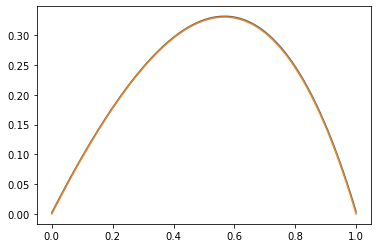

In [5]:

N = 500
# subdivision of the interval
X = np.linspace(0,1,N)
h = (X[1] - X[0])

# -A/h^2 + C
#B = M(N)/(h**2) + np.diag(X)
# this is probably more accurate as N**2 has no rounding error
B = M(N)*(N**2) + np.diag(X)

f = (1 + 2*X - X**2)*np.exp(X) + X**2 - X
g = (1-X)*(np.exp(X)-1)

Y = np.linalg.solve(B, f)
plt.plot(X, Y)
plt.plot(X, g);

np.max(np.abs(Y - g))

---

# Jacobi method

In numerical linear algebra, the Jacobi method is an iterative algorithm for determining the solutions of a strictly diagonally dominant system of linear equations. Each diagonal element is solved for, and an approximate value is plugged in. The process is then iterated until it converges. This algorithm is a stripped-down version of the Jacobi transformation method of matrix diagonalization. The method is named after Carl Gustav Jacob Jacobi.

https://en.wikipedia.org/wiki/Jacobi_method

In [7]:
C = np.array([2,1,5,7]).reshape(2,2)

In [8]:
def decompose(C):
    D = np.array([C[i,i] for i in range(C.shape[0])])
    LU = np.copy(C) - np.diag(D)
    return D, LU

V = np.ones(2)
b = np.array([11,13])
D, LU = decompose(C)

In [732]:
for k in range(20):
    #V = (-LU.dot(V) + b)/D
    V = V + (-C.dot(V) + b)/D
C.dot(V)

array([10.99999999, 13.        ])

In [297]:
# initialize the matrix
C = np.array([[10., -1., 2., 0.],
              [-1., 11., -1., 3.],
              [2., -1., 10., -1.],
              [0.0, 3., -1., 8.]])
# initialize the RHS vector
b = np.array([6., 25., -11., 15.])
V = np.zeros_like(C[0])

D, LU = decompose(C)

VS = []
for k in range(10):
    V = (-LU.dot(V) + b)/D
    VS.append(V)

[np.linalg.norm( b - C.dot(v)) for v in VS]

[11.353748880275788,
 4.990955280047901,
 2.0298776446900537,
 0.891140645474472,
 0.3686282891573499,
 0.16047307873257013,
 0.06710618527173733,
 0.029021532936104287,
 0.012221298598745501,
 0.005260793263328036]

---

## Jacobi applied to the exo 8

In [9]:
N = 200
X = np.linspace(0,1,N)

B = M(N)*(N**2) + np.diag(X)
# could use
# D = 2*N**2 - X
D = np.array([B[i,i] for i in range(N)])

# target function
b = (1 + 2*X - X**2)*np.exp(X) + X**2 - X 
# exact solution
g = (1-X)*(np.exp(X)-1)
# initial guess
V = np.ones(N)


## Iteration loop

In [10]:
#%%timeit

for k in range(100000):
    #V = (-LU.dot(V) + b)/D
    V = V + (-B.dot(V) + b)/D
    

(0.008589502825312147, 0.008589502825312147)

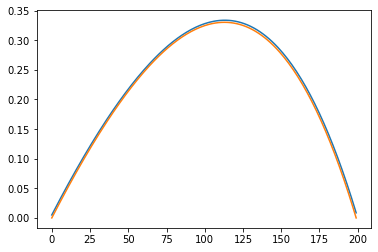

In [19]:
plt.plot(V);
plt.plot(g );

np.max(np.abs(V - g)), np.linalg.norm(V - g, np.inf)

In [12]:
#%%timeit
K = N**2*np.array([1,-2,1])

for k in range(100000):
    #trick to avoid matrix multiplication
    V = V + ( np.convolve(V, K, mode='same')- X*V + b)/D
    

In [17]:
import scipy
from  scipy import signal
#https://stackoverflow.com/questions/53550764/python-numpy-is-there-a-faster-way-to-convolve

In [18]:
K = N**2*np.array([1,-2,1])

for k in range(100000):
    #trick to avoid matrix multiplication
    V = V + ( scipy.signal.convolve(V,K, mode='same')- X*V + b)/D

In [20]:
! ../.g

[master 6405015] web
 1 file changed, 41 insertions(+), 19 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 14.48 KiB | 7.24 MiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   e538250..6405015  master -> master
